## Regresión Logística

#### Librerias

In [28]:
# Se importa la libreria del numpy y pandas
import numpy as np
import pandas as pd

# Se importan las librerias de visualización
import matplotlib.pyplot as plt
import seaborn as sb

# Se importa la libreria de regresión logistica
from sklearn.linear_model import LogisticRegression
# Se importa la libreria para dividir el set de datos
from sklearn.model_selection import train_test_split
# Se importa la libreria para KFold
from sklearn.model_selection import KFold
# Se importa la libreria del score para la validación cruzada
from sklearn.model_selection import cross_val_score
# Se importan las librerias de las métricas de clasificación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Cargue de datos

In [4]:
# Se cargan los datos en un DataFrame
data = pd.read_csv("data/03-usuarios_win_mac_lin.csv")

data

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


#### Preprocesamiento

In [5]:
# Se genera las estadísticas del DataFrame
data.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [7]:
# Se analiza la cantidad de registros para la columna clase
data['clase'].value_counts()

# Otra forma
#data.groupby('clase').size()

clase
0    86
1    40
2    44
dtype: int64

#### Visualización e Datos

/var/folders/0m/xmkg_d4s05j9zcbpwwncd19w0000gn/T/ipykernel_10636/2755072904.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['clase'], 1).hist()


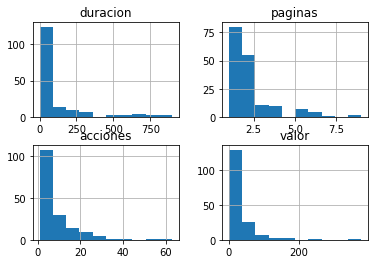

In [12]:
# Se genera el histograma de los datos
data.drop(['clase'], 1).hist()
plt.show()

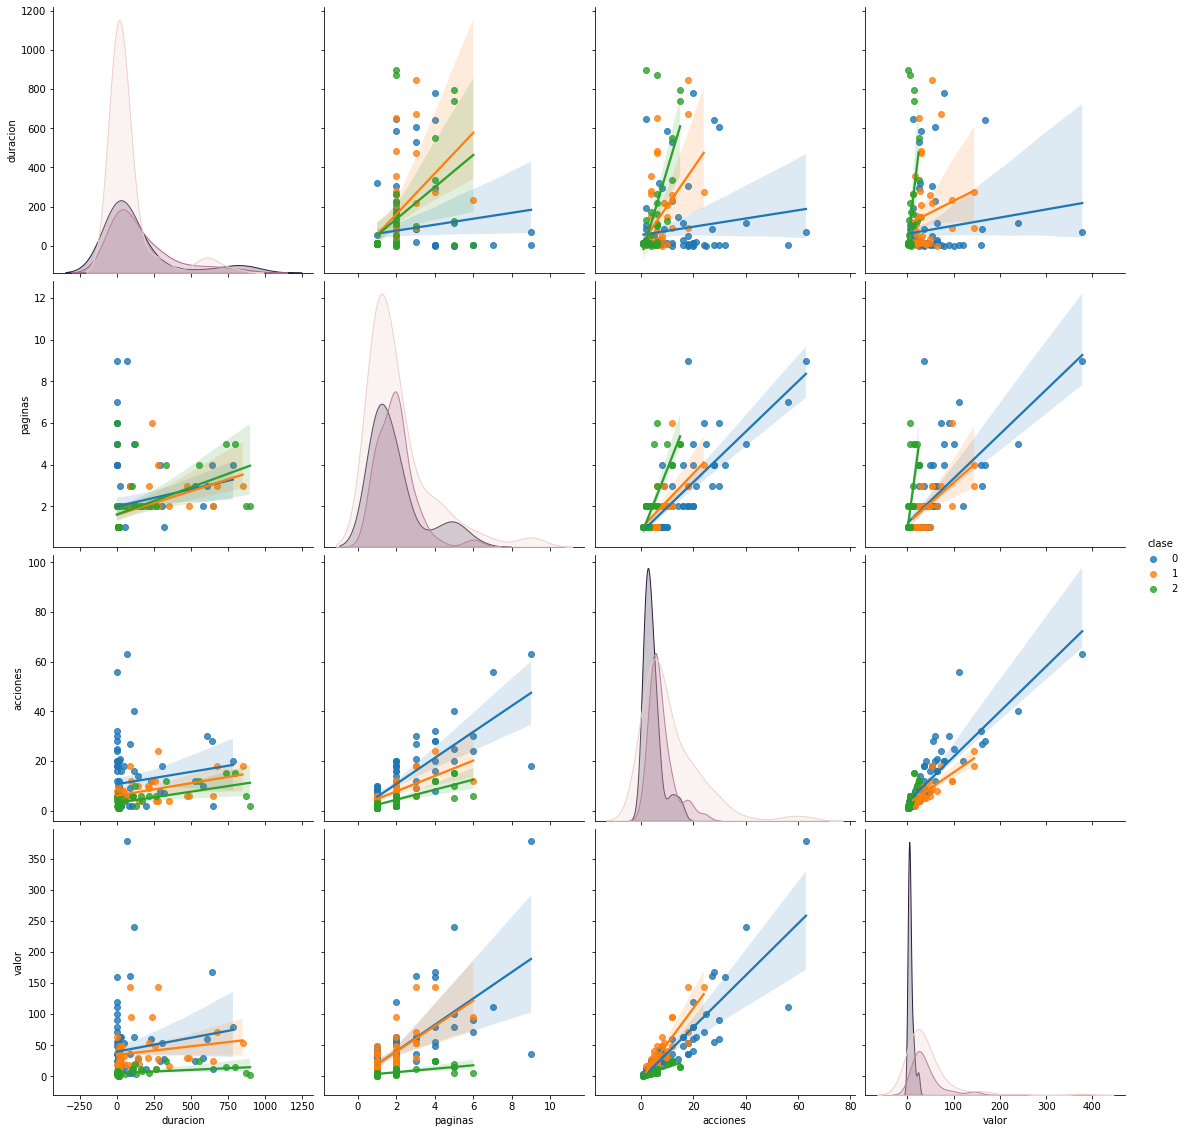

In [14]:
# Concentración lineal de las salidas de usuarios por colores: Windows = azul; Macintosh = verde; Linux = rojo
sb.pairplot(data.dropna(), 
            hue = 'clase', 
            height = 4, 
            vars = ['duracion', 'paginas', 'acciones', 'valor'], 
            kind = 'reg')

#### Modelo de Regresión Logística

In [21]:
# Se definen las características
X = np.array(data.drop(['clase'],1))
# Se define la variable objetivo
y = np.array(data['clase'])

X.shape

/var/folders/0m/xmkg_d4s05j9zcbpwwncd19w0000gn/T/ipykernel_10636/2464627177.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['clase'],1))


(170, 4)

In [43]:
# Se crea el modelo de regresión logística
RL = LogisticRegression(max_iter=1000)

# Se entrena el modelo
RL.fit(X, y)

LogisticRegression(max_iter=1000)

In [44]:
# Se genera la predicción con los datos de las características
prediction = RL.predict(X)

print(prediction)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0
 0 1 1 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


In [45]:
# Se genera la precisión del modelo
RL.score(X, y)

0.7764705882352941

#### Validación del modelo

In [66]:
# Se dividen los datos para entrenamiento (80%) y pruebas (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 7)

# Se adiciona la validación cruzada (10)
#kfold = KFold(n_splits = 10, shuffle = True)
result = cross_val_score(RL, X_train, y_train, cv = 10)

#print("Regressión Logistica : %s" % result.mean())

prediction = RL.predict(X_test)

print("Accuracy: %.5s" % accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print("--------------------------------------------------------------------------")
print(classification_report(y_test, prediction))



Accuracy: 0.852
[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



#### Predicción

In [70]:
X_predict = pd.DataFrame({'duracion' : [10], 'paginas' : [3], 'acciones' : [5], 'valor' : [9]})

RL.predict(X_predict)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([2])